In [1]:
import numpy as np

import matplotlib.pyplot as plt

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind

from auriga_basics import *
from auriga_functions import *

%matplotlib inline

In [4]:
machine = 'mac'
machine = 'magny'

if machine == 'magny':
    filedir = "/home/extmilan/masterthesis/files/"
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
    plotdir = "/home/extmilan/masterthesis/plots/"
elif machine == 'mac':
    filedir = "/Users/smilanov/Documents/masterthesis/auriga_files/files/"
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
else:
    raise NotADirectoryError

In [145]:
halo_number = 24  # range(1, 31):
halodir = basedir + "halo_{0}/".format(halo_number)
snappath = halodir + "output/"
level = 4
#### action time evolution
startnr = 73
endnr = 128

lookback_time_Gyr = []
jR_all = []
jz_all = []
lz_all = []
for snap_number in range(startnr, endnr, 1):
    print(snap_number)
    s, sf = eat_snap_and_fof(level, halo_number, snap_number, snappath, loadonlytype=[4], 
        haloid=0, galradfac=0.1, verbose=False, rotate_disk=0, use_principal_axis=0, euler_rotation=0, use_cold_gas_spin=0, do_rotation=0) 

    # Clean negative and zero values of gmet to avoid RuntimeErrors
    # later on (e.g. dividing by zero)
    #s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 ) 

    snap_time = s.cosmology_get_lookback_time_from_a( s.time, is_flat=True )
    lookback_time_Gyr.append(snap_time)
    infile = '/home/extmilan/masterthesis/files/actions_merger_73_2648_parts_snap_' +str(snap_number)+ '_nonsmoothed_pot_params.txt'
    ids, r, jR_kpckms, lz_kpckms, jz_kpckms = np.loadtxt(infile)

    jR_hist = np.histogram(jR_kpckms, bins = 20, range = (0., 15000.))
    jz_hist = np.histogram(jz_kpckms, bins = 20, range = (0., 5000.))
    lz_hist = np.histogram(lz_kpckms, bins = 20, range = (-10000., 10000.))
#cond = np.where((jR_kpckms <= 15000.)  & (np.abs(lz_kpckms) <=5000.) & (jz_kpckms <= 5000.))    
    jR_all.append(jR_hist)
    jz_all.append(jz_hist)
    lz_all.append(lz_hist)
    #np.loadtxt('actions_snap_' + str(snap_number) + '_nonsmoothed_pot_params.txt
    

73
[ 15.47813797  14.92653275  15.98590374]
74
[ 15.85394859  15.28774834  16.39402962]
75
[ 16.16160011  15.58262157  16.72860718]
76
[ 16.47659492  15.88422775  17.06827354]
77
[ 16.79800034  16.19346237  17.41295624]
78
[ 17.20534706  16.5902729   17.85304451]
79
[ 17.53638649  16.91461563  18.2147541 ]
80
[ 17.78905106  17.16118431  18.49117279]
81
[ 18.13132668  17.49447441  18.86812019]
82
[ 18.48038101  17.83345413  19.25479507]
83
[ 18.83633041  18.17889214  19.65101624]
84
[ 19.10744095  18.44243622  19.95356178]
85
[ 19.47507477  18.79951668  20.36402512]
86
[ 19.75509262  19.0717144   20.67724609]
87
[ 20.13412285  19.44070625  21.10229874]
88
[ 20.42412758  19.72184372  21.42675972]
89
[ 20.81840324  20.10211563  21.86827469]
90
[ 21.11937714  20.39230919  22.20462799]
91
[ 21.42389488  20.68611908  22.54693604]
92
[ 21.73373222  20.98360252  22.89403915]
93
[ 22.153759    21.38641167  23.364851  ]
94
[ 22.47373009  21.69274902  23.72468185]
95
[ 22.7996521   22.0025444   2

In [146]:
print(lookback_time_Gyr)

[8.6990211581636299, 8.5252475597271111, 8.3825520997474072, 8.2365443853971616, 8.0871857752488765, 7.8957200166374646, 7.7386922627471932, 7.6186521309154633, 7.4555500192211301, 7.2889401605723494, 7.1187996256302029, 6.9888652156874338, 6.8125004792532939, 6.6778802165313964, 6.495248977626658, 6.3559182588176908, 6.1669974933569689, 6.0229465593882683, 5.8768735073487273, 5.7287806295844996, 5.5281878275013261, 5.3753980216321411, 5.2206051600454408, 5.0638170290850022, 4.9050426845407005, 4.744292444640525, 4.5815778793696653, 4.4169117961172937, 4.25030822167591, 4.0817823806421902, 3.9683719440695908, 3.7966793300503907, 3.6231107024105715, 3.4476854370571401, 3.2704239621028588, 3.1512400764782584, 2.9709663781604099, 2.7889157772067175, 2.6665733211784164, 2.4816148011082095, 2.2949450295802403, 2.1695606612398457, 1.9800970740728014, 1.8528750849174935, 1.6606932445711653, 1.4669178894426511, 1.3368632001238121, 1.1404960591271716, 1.008740630401181, 0.80986355178559311, 0.6

In [152]:
snapnrs = np.arange(startnr, endnr, 1)
ivline = snapnrs.tolist().index(104)

In [153]:
dim1 = len(lookback_time_Gyr)
jR_all_arr = np.array(jR_all)
jR_arr = np.array([])
for i in jR_all_arr[:,0].tolist():
    jR_arr = np.append(jR_arr, i.tolist())
jR_arr = jR_arr.reshape(dim1,20)

jz_all_arr = np.array(jz_all)
jz_arr = np.array([])
for i in jz_all_arr[:,0].tolist():
    jz_arr = np.append(jz_arr, i.tolist())
jz_arr = jz_arr.reshape(dim1,20)

lz_all_arr = np.array(lz_all)
lz_arr = np.array([])
for i in lz_all_arr[:,0].tolist():
    lz_arr = np.append(lz_arr, i.tolist())
lz_arr = lz_arr.reshape(dim1,20)

In [154]:
jR_all[1][1][-1]


15000.0

In [155]:
x0 = np.max(lookback_time_Gyr)
x1 = np.min(lookback_time_Gyr)
xticks = np.around(np.linspace(x0,x1,6), 2)

yticks_jR = np.around(np.linspace(jR_all[1][1][0], jR_all[1][1][-1], 5),1)
yticks_jz = np.around(np.linspace(jz_all[1][1][0], jz_all[1][1][-1], 5),1)
yticks_lz = np.around(np.linspace(lz_all[1][1][0], lz_all[1][1][-1], 5),1)

In [156]:
yticks_jR

array([     0.,   3750.,   7500.,  11250.,  15000.])

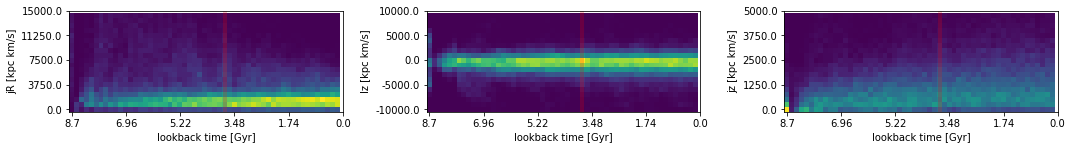

In [162]:
#print(jR_arr.reshape(20,55))

fig, ax = plt.subplots(1,3, figsize=(15,5))
im1 = ax[0].imshow(jR_arr.T, origin='lower')
im2 = ax[1].imshow(lz_arr.T, origin='lower')
im3 = ax[2].imshow(jz_arr.T, origin='lower')
ax[0].set_xticks(np.linspace(0,dim1,6))
ax[0].set_xticklabels(xticks)
ax[1].set_xticks(np.linspace(0,dim1,6))
ax[1].set_xticklabels(xticks)
ax[2].set_xticks(np.linspace(0,dim1,6))
ax[2].set_xticklabels(xticks)
ax[0].set_xlabel('lookback time [Gyr]')
ax[1].set_xlabel('lookback time [Gyr]')
ax[2].set_xlabel('lookback time [Gyr]')

ax[0].set_yticks(np.linspace(0,20,5))
ax[0].set_yticklabels(yticks_jR)
ax[1].set_yticks(np.linspace(0,20,5))
ax[1].set_yticklabels(yticks_lz)
ax[2].set_yticks(np.linspace(0,20,5))
ax[2].set_yticklabels(yticks_jz)

ax[0].set_ylabel('jR [kpc km/s]')
ax[1].set_ylabel('lz [kpc km/s]')
ax[2].set_ylabel('jz [kpc km/s]')
fig.tight_layout()

ax[0].axvline(ivline, color = 'red', linewidth=4, alpha =0.2)
ax[1].axvline(ivline, color = 'red', linewidth=4, alpha =0.2)
ax[2].axvline(ivline, color = 'red', linewidth=4, alpha =0.2)


In [163]:
#fig.savefig(plotdir + 'action_time_evolution_merger_73.png', dpi = 300, format = 'png')